## Question 1. 
#### **Zilong Lin (zillin), Ajinkya Pawale (ajpawale)**

Using the MNIST dataset, perform the following (Note that you may need to perform sampling to reduce the amount of data or perform PCA to reduce the dimensionality of each example beforehand):


In [ ]:
from torchvision import datasets

train_set = datasets.MNIST('./', train=True, download=True)
test_set = datasets.MNIST('./', train=False, download=True)

train_set_array = train_set.data.numpy()
test_set_array = test_set.data.numpy()
train_targets_array = train_set.targets.numpy()
test_targets_array = test_set.targets.numpy()

train_set_array = train_set_array.reshape((train_set_array.shape[0], train_set_array.shape[1] * train_set_array.shape[2]))
test_set_array = test_set_array.reshape((test_set_array.shape[0], test_set_array.shape[1] * test_set_array.shape[2]))

import random
sampled_indices = random.sample(range(train_set_array.shape[0]), k=6000)
sampled_train_set_array = train_set_array[sampled_indices]
sampled_train_targets_array = train_targets_array[sampled_indices]

from sklearn.decomposition import PCA
pca = PCA(n_components=100)
sampled_train_set_array = pca.fit_transform(X=sampled_train_set_array)
sampled_test_set_array = pca.transform(X=test_set_array)
print("The number of training samples: {}. The dimension of training samples: {}".format(sampled_train_set_array.shape[0], sampled_train_set_array.shape[1]))

The number of training samples: 6000. The dimension of training samples: 100


#### **1. Perform K-means clustering using an appropriate value for K, where the clusters are initialized from random data from the dataset. Discuss how you selected the appropriate value for K.**

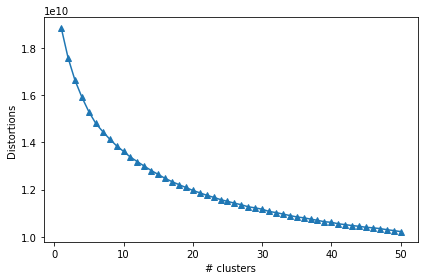

In [ ]:
from sklearn.cluster import KMeans
n_cluster_candiates_num = 50
distortions = []
for i in range(1, n_cluster_candiates_num + 1):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X=sampled_train_set_array)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, n_cluster_candiates_num + 1), distortions, marker='^')
plt.xlabel('# clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

**K choice**

Based on the above figure, the best K is 14 using elbow method.

#### **2. For the appropriate value of K that was selected, display the cluster centroids. Discuss the similarities and differences between the centroids, and how they relate to the labels of the data, if at all.**

K: 14. The dimension of centroids: 100


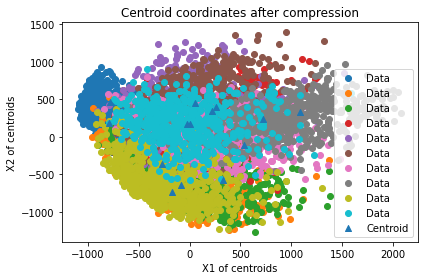

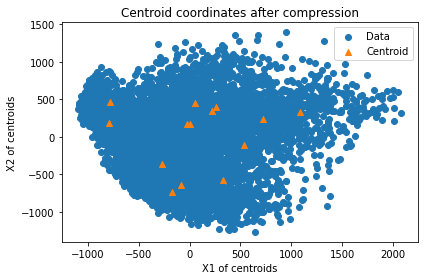

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=14, init='random', n_init=10, max_iter=300, random_state=0)
kmeans1.fit(X=sampled_train_set_array)
centroids1 = kmeans1.cluster_centers_
print("K: {}. The dimension of centroids: {}".format(centroids1.shape[0], centroids1.shape[1]))

from sklearn.decomposition import PCA
pca_centroid = PCA(n_components=2)
dimred_sampled_train_set_array = pca_centroid.fit_transform(X=sampled_train_set_array)
dimred_sampled_train_set_array_dict = {}
for i, label in enumerate(sampled_train_targets_array):
  if label not in dimred_sampled_train_set_array_dict:
    dimred_sampled_train_set_array_dict[label] = []
  dimred_sampled_train_set_array_dict[label].append(dimred_sampled_train_set_array[i])
  

import matplotlib.pyplot as plt
dimred_centroids1 = pca_centroid.transform(X=centroids1)

for label in dimred_sampled_train_set_array_dict:
  dimred_sampled_train_set_array_dict[label] = np.array(dimred_sampled_train_set_array_dict[label])
  plt.scatter(dimred_sampled_train_set_array_dict[label][:, 0], dimred_sampled_train_set_array_dict[label][:,1], marker='o', label='Data')
plt.scatter(dimred_centroids1[:, 0], dimred_centroids1[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

plt.scatter(dimred_sampled_train_set_array[:, 0], dimred_sampled_train_set_array[:,1], marker='o', label='Data')
plt.scatter(dimred_centroids1[:, 0], dimred_centroids1[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

**Discussion**

In above two figures, the triangles are the centroids. The centorids in outer range of the scatters can match better with the clusters. The centroids in inner range have worse matching. The data in the inner range have more similarities than those in the outer range, making the centorids in the outer range match better than those in the inner range.

#### **3. Repeat the above, using k-means++ initialization**

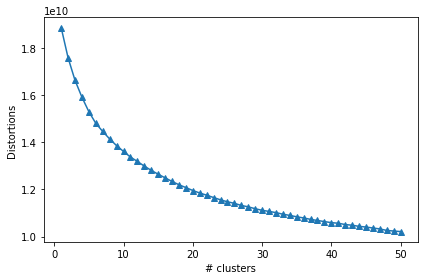

In [ ]:
from sklearn.cluster import KMeans
n_cluster_candiates_num = 50
distortions = []
for i in range(1, n_cluster_candiates_num + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X=sampled_train_set_array)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, n_cluster_candiates_num + 1), distortions, marker='^')
plt.xlabel('# clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

Based on the above figure, the best K is 12 using elbow method.

K: 12. The dimension of centroids: 100


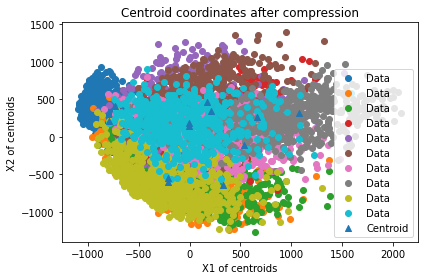

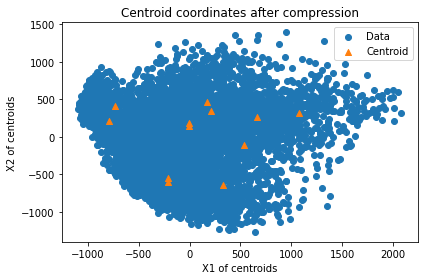

In [ ]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans2.fit(X=sampled_train_set_array)
centroids2 = kmeans2.cluster_centers_
print("K: {}. The dimension of centroids: {}".format(centroids2.shape[0], centroids2.shape[1]))

import matplotlib.pyplot as plt
dimred_centroids2 = pca_centroid.transform(X=centroids2)

for label in dimred_sampled_train_set_array_dict:
  dimred_sampled_train_set_array_dict[label] = np.array(dimred_sampled_train_set_array_dict[label])
  plt.scatter(dimred_sampled_train_set_array_dict[label][:, 0], dimred_sampled_train_set_array_dict[label][:,1], marker='o', label='Data')
plt.scatter(dimred_centroids2[:, 0], dimred_centroids2[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

plt.scatter(dimred_sampled_train_set_array[:, 0], dimred_sampled_train_set_array[:,1], marker='o', label='Data')
plt.scatter(dimred_centroids2[:, 0], dimred_centroids2[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

**Discussion**

The sitations for centroids and the relation between centroid and data are the same with Question 2.

In above two figures, the triangles are the centroids. The centorids in outer range of the scatters can match better with the clusters. The centroids in inner range have worse matching. The data in the inner range have more similarities than those in the outer range, making the centorids in the outer range match better than those in the inner range.

#### **4. Now assume that you have labeled information. Randomly choose 1 sample from each of the classes to serve as the initial cluster centers. Run the K-means algorithm. Display the final and initial cluster centroids. Compare and contrast the initial cluster centers to the final cluster centers. Do they still represent the labels?**

In [ ]:
import random
import numpy as np
labels_dict = {}
for i, label in enumerate(sampled_train_targets_array):
  if label not in labels_dict:
    labels_dict[label] = []
  labels_dict[label].append(i)

sampled_label_index = np.zeros((len(labels_dict), sampled_train_set_array.shape[-1]))
for j, _label in enumerate(labels_dict.keys()):
  rand_index = random.sample(labels_dict[_label], k=1)
  sampled_label_index[j] = sampled_train_set_array[rand_index]

In [ ]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=10, init=sampled_label_index, n_init=10, max_iter=300, random_state=0)
kmeans3.fit(X=sampled_train_set_array)
centroids3 = kmeans3.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


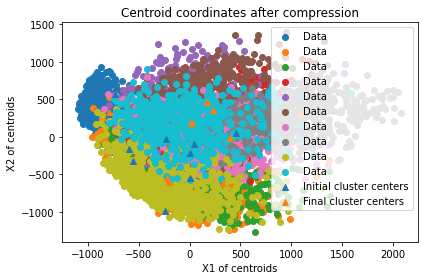

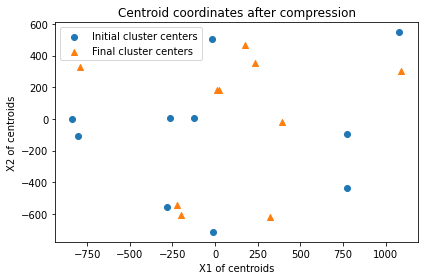

In [ ]:
import matplotlib.pyplot as plt
dimred_centroids3 = pca_centroid.transform(X=centroids3)

for label in dimred_sampled_train_set_array_dict:
  dimred_sampled_train_set_array_dict[label] = np.array(dimred_sampled_train_set_array_dict[label])
  plt.scatter(dimred_sampled_train_set_array_dict[label][:, 0], dimred_sampled_train_set_array_dict[label][:,1], marker='o', label='Data')
plt.scatter(dimred_sampled_label_index[:, 0], dimred_sampled_label_index[:,1], marker='^', label='Initial cluster centers')
plt.scatter(dimred_centroids3[:, 0], dimred_centroids3[:,1], marker='^', label='Final cluster centers')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

dimred_sampled_label_index = pca_centroid.transform(X=sampled_label_index)
plt.scatter(dimred_sampled_label_index[:, 0], dimred_sampled_label_index[:,1], marker='o', label='Initial cluster centers')
plt.scatter(dimred_centroids3[:, 0], dimred_centroids3[:,1], marker='^', label='Final cluster centers')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

**Discussion**

For some centroids, the initial centers are close to the final centers, while some don't. But the for the centers which are not close, they would not go too far away from the initial centers.

#### **5.How do the cluster centroids compare for the above three approaches?**

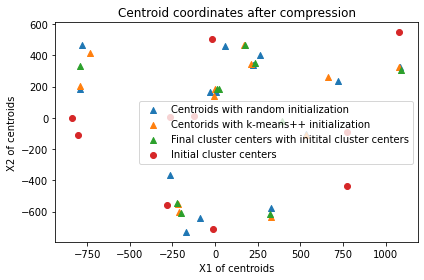

In [ ]:
import matplotlib.pyplot as plt
dimred_centroids3 = pca_centroid.transform(X=centroids3)
dimred_sampled_label_index = pca_centroid.transform(X=sampled_label_index)
plt.scatter(dimred_centroids1[:, 0], dimred_centroids1[:,1], marker='^', label='Centroids with random initialization')
plt.scatter(dimred_centroids2[:, 0], dimred_centroids2[:,1], marker='^', label='Centorids with k-means++ initialization')
plt.scatter(dimred_centroids3[:, 0], dimred_centroids3[:,1], marker='^', label='Final cluster centers with initital cluster centers')
plt.scatter(dimred_sampled_label_index[:, 0], dimred_sampled_label_index[:,1], marker='o', label='Initial cluster centers')

plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

Shown in above figure, the centroids obtained from above three methods are clustering. We can some centroids cluster closely like the cluster in the middle of the figure. In total, the centroids for the same category can group into one cluster. 

#### **6. Compute the variance (as shown in class) for each of the three approaches. How do they compare?**

In [ ]:
import numpy as np
results1 = kmeans1.predict(X=sampled_train_set_array)
results2 = kmeans2.predict(X=sampled_train_set_array)
results3 = kmeans3.predict(X=sampled_train_set_array)
variance1 = 0
for i, label in enumerate(results1):
  variance1 += np.linalg.norm(x=(sampled_train_set_array[i] - centroids1[label]))
variance2 = 0
for i, label in enumerate(results2):
  variance2 += np.linalg.norm(x=(sampled_train_set_array[i] - centroids2[label]))
variance3 = 0
for i, label in enumerate(results3):
  variance3 += np.linalg.norm(x=(sampled_train_set_array[i] - centroids3[label]))
print("Variance for Test with random initialization: {}\nVariance for Test with k-means++ initialization: {}\nVariance for Test with label information: {}".format(variance1, variance2, variance3))

Variance for Test with random initialization: 8603353.806620682
Variance for Test with k-means++ initialization: 8736083.903182458
Variance for Test with label information: 8923104.877054023


**Discussion**

The variance with random initialization (K=14) is small than the variance with k-means++ inititalization (K=12), and the variance with k-means++ inititalization is small than the variance with label information (K=10). The difference is influenced by the differences in the numbers of clusters. The smallest variance (the variance with random initialization) has the most centroids (14 centroids) and clusters, making the variance smaller. 